In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hacklive-av/Train_eP48B9k.csv
/kaggle/input/hacklive-av/Test_jPKyvmK.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

#### read csv 

In [6]:
df=pd.read_csv('/kaggle/input/hacklive-av/Train_eP48B9k.csv')
test=pd.read_csv('/kaggle/input/hacklive-av/Test_jPKyvmK.csv')
df.head(2)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0


### Dataset info

In [18]:
print('shape of train data',df.shape)
print('Number of feature ',len(df.columns))
col=df.columns
cat_feature=[i for i in col if df[i].dtype==object]
nu_feature=list(set(col)-set(cat_feature))
cat_feature.remove('id')
print('categorical feature are ',cat_feature)
print('numerical feature are ',nu_feature)

shape of train data (31647, 18)
Number of feature  18
categorical feature are  ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome']
numerical feature are  ['num_contacts_in_campaign', 'term_deposit_subscribed', 'num_contacts_prev_campaign', 'customer_age', 'last_contact_duration', 'days_since_prev_campaign_contact', 'day_of_month', 'balance']


['id',
 'customer_age',
 'job_type',
 'marital',
 'education',
 'default',
 'balance',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'day_of_month',
 'month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign',
 'prev_campaign_outcome',
 'term_deposit_subscribed']

In [9]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [10]:
df.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [11]:
df.dtypes

id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
dtype: object

#### number of unique value in each feature

In [12]:
df.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

### Exploratory Data Analysis

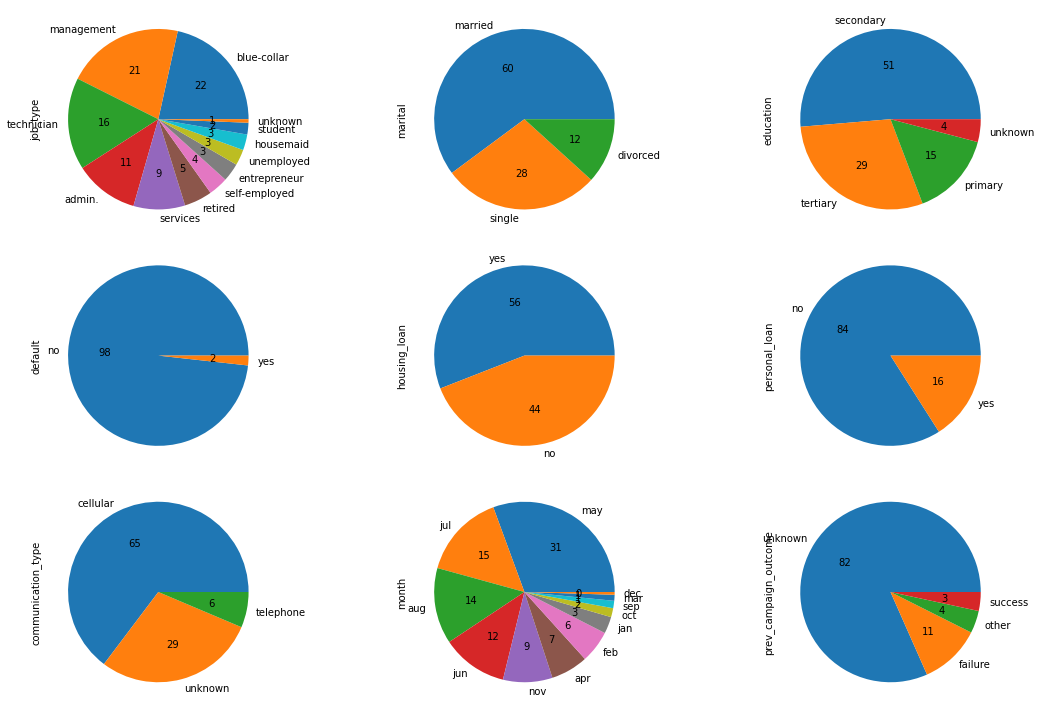

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(16, 10))
axes = [ax for axes_row in axes for ax in axes_row]
for i in range(len(cat_feature)):
    df[cat_feature[i]].value_counts().plot(kind='pie',ax=axes[i],autopct="%.0f")
    axes[i].set_label('')
plt.tight_layout()

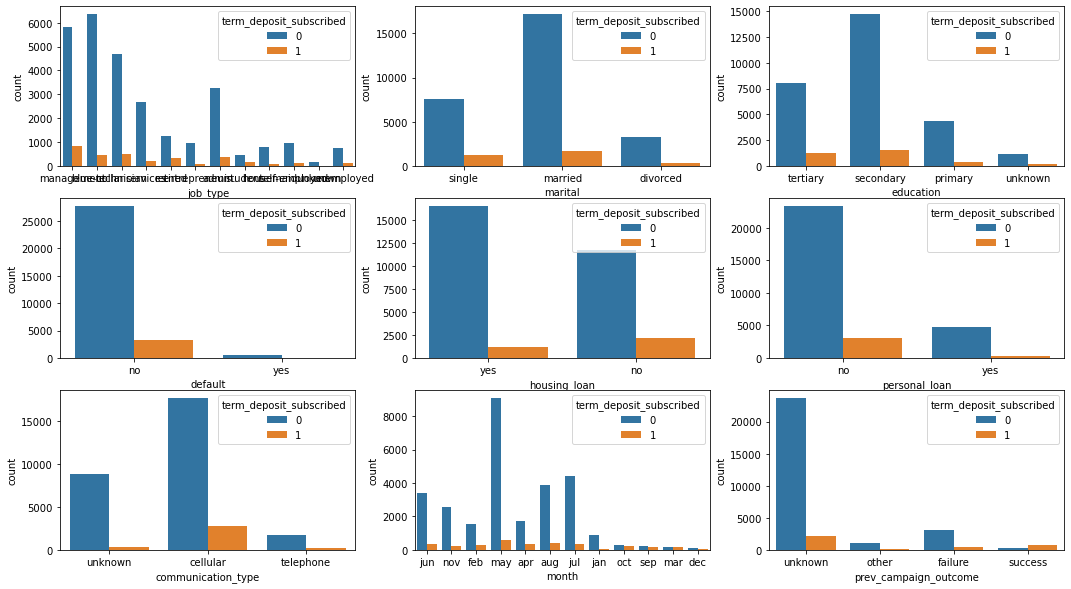

In [14]:
plt.figure(figsize=(18,10))
for i in range(len(cat_feature)):
    plt.subplot(3,3,i+1)
    sns.countplot(df[cat_feature[i]],hue=df['term_deposit_subscribed'])


### Numerical Features

In [19]:
nu_feature

['num_contacts_in_campaign',
 'term_deposit_subscribed',
 'num_contacts_prev_campaign',
 'customer_age',
 'last_contact_duration',
 'days_since_prev_campaign_contact',
 'day_of_month',
 'balance']

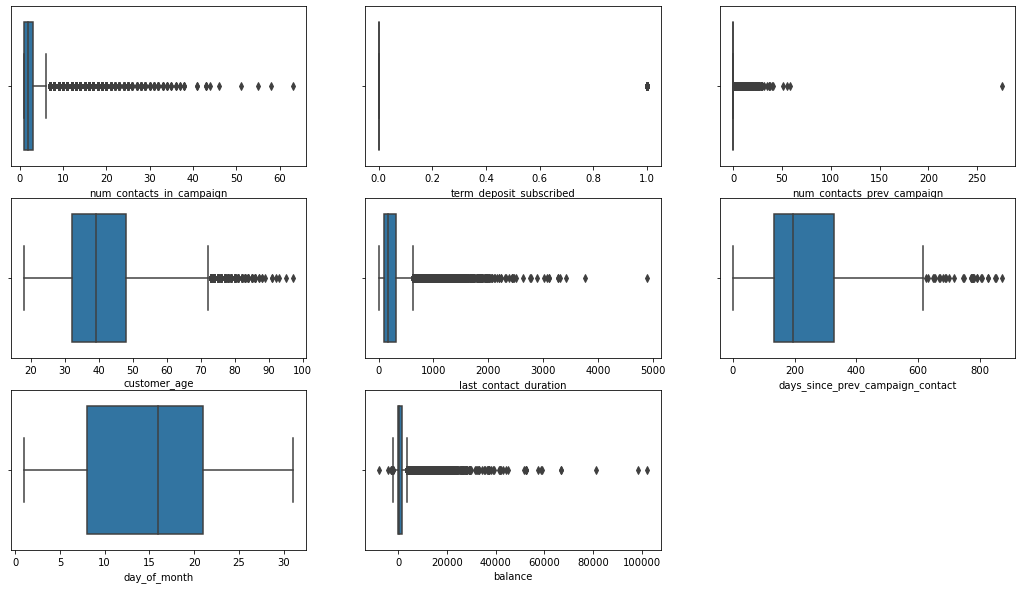

In [20]:
plt.figure(figsize=(18,10))
for i in range(len(nu_feature)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[nu_feature[i]])


In [21]:
total=pd.concat([df,test]).reset_index(drop = True)


In [22]:
total.marital=total.marital.fillna('un')
def fun1(total):
    if total.marital=='un':
        if total.job_type=='student':
            total.marital='single'
        else:
            total.marital='married'
    return total
total=total.apply(fun1,axis='columns')

In [23]:
total.customer_age=total.customer_age.fillna(999)
def fun2(total):
    if total.customer_age==999:
        if total.job_type=='admin.':    
            total.customer_age=38
        if total.job_type=='blue-collar':  
            total.customer_age=39
        if total.job_type=='entrepreneur': 
            total.customer_age=41
        if total.job_type=='housemaid':    
            total.customer_age=45
        if total.job_type=='management' :  
            total.customer_age=39
        if total.job_type=='retired' :    
            total.customer_age=61
        if total.job_type=='self-employed' : 
            total.customer_age=39
        if total.job_type=='services':  
            total.customer_age=38
        if total.job_type=='student' : 
            total.customer_age=25
        if total.job_type=='technician' :  
            total.customer_age=38
        if total.job_type=='unemployed': 
            total.customer_age=40
        if total.job_type=='unknown' :  
            total.customer_age=46    
    return total
total=total.apply(fun2,axis='columns')

In [24]:
total=pd.get_dummies(total, columns= cat_feature)

In [25]:
total.balance=total.balance.fillna(int(total.balance.mean()))
total.num_contacts_in_campaign=total.num_contacts_in_campaign.fillna(int(total.last_contact_duration.mode()[0]))
total.last_contact_duration=total.last_contact_duration.fillna(0)
total.days_since_prev_campaign_contact=total.days_since_prev_campaign_contact.fillna(int(total.days_since_prev_campaign_contact.mean()))


In [26]:
total.isna().sum()

id                                      0
customer_age                            0
balance                                 0
day_of_month                            0
last_contact_duration                   0
num_contacts_in_campaign                0
days_since_prev_campaign_contact        0
num_contacts_prev_campaign              0
term_deposit_subscribed             13564
job_type_admin.                         0
job_type_blue-collar                    0
job_type_entrepreneur                   0
job_type_housemaid                      0
job_type_management                     0
job_type_retired                        0
job_type_self-employed                  0
job_type_services                       0
job_type_student                        0
job_type_technician                     0
job_type_unemployed                     0
job_type_unknown                        0
marital_divorced                        0
marital_married                         0
marital_single                    

In [27]:
total.shape

(45211, 53)

In [28]:
train,test1=total[:df.shape[0]], total[df.shape[0]:].reset_index(drop = True)
feature=set(total.columns)-set(['id','term_deposit_subscribed'])

### split dataset

In [29]:
x_train,x_test,y_train,y_test=train_test_split(train[feature],train['term_deposit_subscribed'],stratify=train['term_deposit_subscribed'])
tes=test1[feature]

### Linear Model

### logistic regression

In [30]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
st=StandardScaler()
st.fit(x_train)
x_train1=st.transform(x_train)
x_test1=st.transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train1,y_train)
pred=lr.predict(x_test1)
f1_score(pred,y_test)

0.47597930524759785

### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
k=[3,5,11]
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1,y_train)
    pred=knn.predict(x_test1)
    print('for k=',i,'f1 score is ',f1_score(pred,y_test))

for k= 3 f1 score is  0.43371757925072046
for k= 5 f1 score is  0.43536404160475484
for k= 11 f1 score is  0.39615076182838815


### SVM

In [33]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train1,y_train)
pred=sv.predict(x_test1)
f1_score(pred,y_test)

0.49146250927988133

### Ensemble Method

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=13)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
f1_score(pred,y_test)

0.516083916083916

**Hyper Parameter Tuning**<br>
`Randomized Search`

In [45]:
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={'n_estimators':[50,100,150,200,500],
               'criterion':['gini','entropy'],
               'min_samples_split':[2,10,20,30,40],
               'max_features':[0.2,.4,.6,.8,1],
               'max_leaf_nodes':[8,16,32,64],
               'random_state':[1,3,50,100,150],
               'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]}
model=RandomizedSearchCV(RandomForestClassifier(),
                          hyperparameter,
                          scoring='f1',
                          n_iter=15,
                          return_train_score=True)

search=model.fit(x_train,y_train)

In [47]:
search.best_score_

0.610806904906488

In [48]:
search.best_params_

{'random_state': 1,
 'n_estimators': 50,
 'min_samples_split': 2,
 'max_leaf_nodes': 64,
 'max_features': 0.2,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 4}}

## **K Fold Cross validation**

In [66]:
from sklearn.model_selection import StratifiedKFold
rf=RandomForestClassifier(random_state= 1,                          
                     n_estimators=50,
                     min_samples_split=2,
                     max_leaf_nodes=64,
                     max_features= 0.2,
                     criterion='gini',
                     class_weight={0: 1, 1: 4})

fold=StratifiedKFold(n_splits=5)
for train_ind,val_ind in fold.split(x_train,y_train):
    train_x,train_y=x_train.iloc[train_ind],y_train.iloc[train_ind]
    val_x,val_y=x_train.iloc[val_ind],y_train.iloc[val_ind]
    rf.fit(train_x,train_y)
    print('f1 score is ',f1_score(val_y,rf.predict(val_x)))

f1 score is  0.6144297905352987
f1 score is  0.6103703703703703
f1 score is  0.6061068702290076
f1 score is  0.6153846153846154
f1 score is  0.6077428780131482


## Xgboost